<a href="https://colab.research.google.com/github/pawarharshit/tensorflow_programs/blob/master/function_apis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
housing = fetch_california_housing()
X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target)

In [0]:
X_train,X_val,y_train,y_val = train_test_split(X_train_full,y_train_full)

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [7]:
from tensorflow import keras
model = keras.models.Sequential([
                                 keras.layers.Dense(30, activation="relu",input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(1)
                                ])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_val, y_val))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8469 - val_loss: 3.1894
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5808 - val_loss: 1.3970
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4519 - val_loss: 0.4581
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4240 - val_loss: 0.4749
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4135 - val_loss: 0.4123
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4014 - val_loss: 0.4369
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3930 - val_loss: 0.3911
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3854 - val_loss: 0.4020
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3831 - val_loss: 0.4200
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3774 - val_loss: 0.3839

<Figure size 720x576 with 0 Axes>

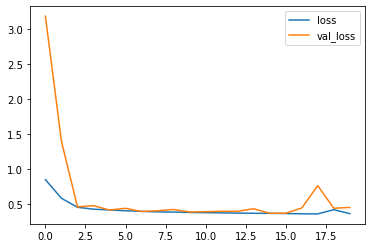

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()

Building Complex Models Using the Functional **API**

In [0]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation=keras.activations.relu)(input_)
hidden2 = keras.layers.Dense(30,activation=keras.activations.relu)(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs = [input_],outputs=[output])

In [17]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_val, y_val))
mse_test = model.evaluate(X_test, y_test)


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7706 - val_loss: 2.1800
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 1.1087 - val_loss: 2.4663
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 1.4991 - val_loss: 0.8005
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5412 - val_loss: 0.4745
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4078 - val_loss: 0.5181
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4355 - val_loss: 0.3870
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3755 - val_loss: 0.3998
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3668 - val_loss: 0.3933
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3690 - val_loss: 0.3810
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3535 - val_loss: 0.4458

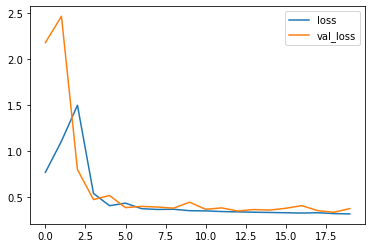

In [18]:
pd.DataFrame(history.history).plot()

 If we send simple features from input to output layers directly and complex features via fully connected layers or highly dense network

In [0]:
input_A = keras.layers.Input(shape=[5],name="wide_input")
input_B = keras.layers.Input(shape=[6],name="deep_input")
hidden1 = keras.layers.Dense(30,activation="relu")(input_B)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])

output = keras.layers.Dense(1, name="output")(concat)

model = keras.Model(inputs=[input_A,input_B],outputs=[output])


In [0]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_val[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]




In [27]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
validation_data=((X_valid_A, X_valid_B), y_val))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.2174 - val_loss: 1.1153
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8740 - val_loss: 0.8081
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7367 - val_loss: 0.6991
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6792 - val_loss: 0.6558
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6449 - val_loss: 0.6262
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6190 - val_loss: 0.6094
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5976 - val_loss: 0.5886
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5792 - val_loss: 0.5706
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5627 - val_loss: 0.5652
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5476 - val_loss: 0.5382

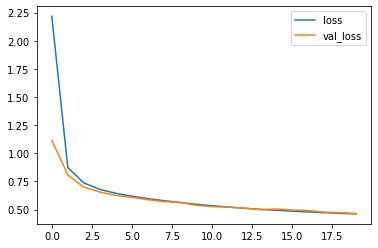

In [29]:
pd.DataFrame(history.history).plot()

multiple outputs

For example, you could perform multitask
classification on pictures of faces, using one output to classify the
person’s facial expression (smiling, surprised, etc.) and another
output to identify whether they are wearing glasses or not.

In [0]:
input_A = keras.layers.Input(shape=[5],name="wide_input")
input_B = keras.layers.Input(shape=[6],name="deep_input")
hidden1 = keras.layers.Dense(30,activation="relu")(input_B)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])

output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

model = keras.Model(inputs=[input_A, input_B], outputs=[output,aux_output])


In [0]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1],optimizer="sgd")


In [32]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
validation_data=([X_valid_A, X_valid_B], [y_val, y_val]))


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8862 - main_output_loss: 0.7873 - aux_output_loss: 1.7770 - val_loss: 1.8164 - val_main_output_loss: 1.8882 - val_aux_output_loss: 1.1701
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5468 - main_output_loss: 0.5031 - aux_output_loss: 0.9406 - val_loss: 0.5213 - val_main_output_loss: 0.4821 - val_aux_output_loss: 0.8747
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4703 - main_output_loss: 0.4341 - aux_output_loss: 0.7965 - val_loss: 0.4828 - val_main_output_loss: 0.4504 - val_aux_output_loss: 0.7745
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4509 - main_output_loss: 0.4212 - aux_output_loss: 0.7177 - val_loss: 0.4886 - val_main_output_loss: 0.4624 - val_aux_output_loss: 0.7250
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4347 - main_output_loss: 0.4087 - aux_output_loss: 0.6685 - val_loss

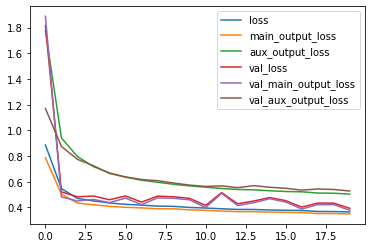

In [33]:
pd.DataFrame(history.history).plot()
